In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import random as rand
import pandas as pd
from scipy.signal import firls

# Лабораторная работа 3.3
Пусть известно, что микрофон искажает записываемый сигнал в соответствии
со следующей частотной характеристикой:
𝐻𝑎 (𝐹 ) =  1 − |𝐹 |/𝐹𝑐 , |𝐹 | < 𝐹𝑐
0, иначе
где 𝐹𝑐 = 30 кГц. Для того, чтобы компенсировать искажения предлагается следующая процедура : аналоговый сигнал 𝑣𝑎 (𝑡) на выходе микрофона дискретизируется с частотой 44 кГц (при этом предполагается, что сигнал пропущен через идеальный антиалиасный фильтр, не пропускающий частоты выше частоты Найквиста); полученный цифровой сигнал 𝑥[𝑛] пропускается через цифровой фильтр с частотной характеристикой 𝐻(𝜔). Определен вид 𝐻(𝜔), который компенсирует искажения микрофона и рассчитаны коэффициенты соответствующего КИХ-фильтра

In [2]:
A = 10
A2 = 3
A3 = 4
f = 0.2
f2 = 0.1
f3 = 0.6
F = 44000
Fc = 30000
N = int(F/2)

source_signal = [rand.uniform(-100, 100) for _ in range(N)] # временная генерация случайного сигнала; на гармониках сложно отслеживать разницу

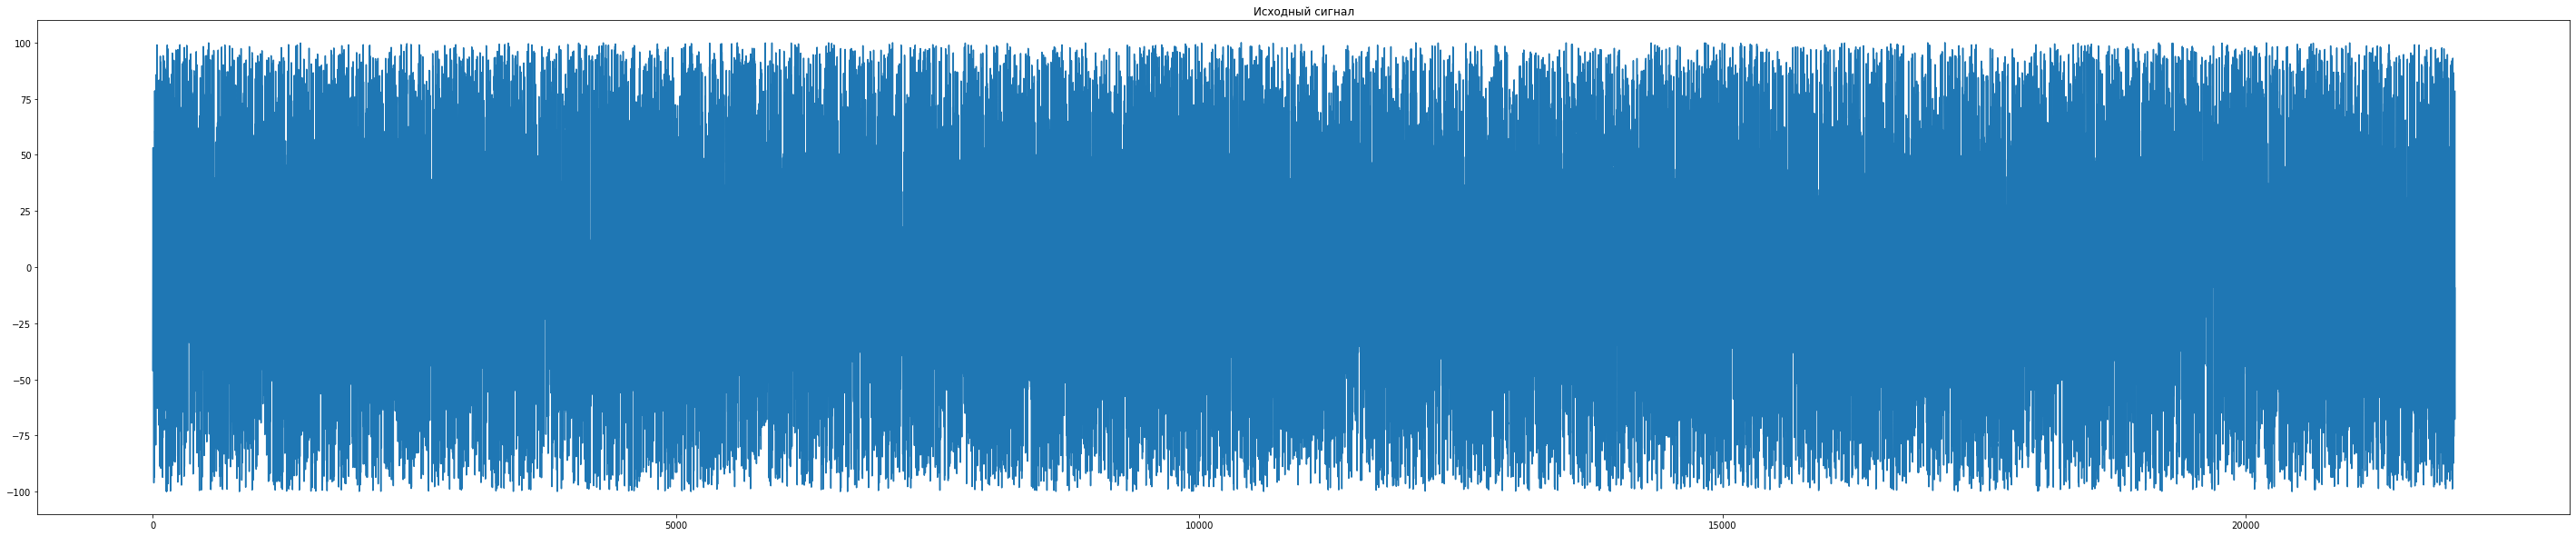

In [3]:
plt.figure(figsize=(50, 10))
plt.title("Исходный сигнал")
plt.plot(range(N), source_signal)

In [4]:
dfp = np.fft.fft(source_signal)
fk = np.fft.fftfreq(len(dfp), d=1/F)

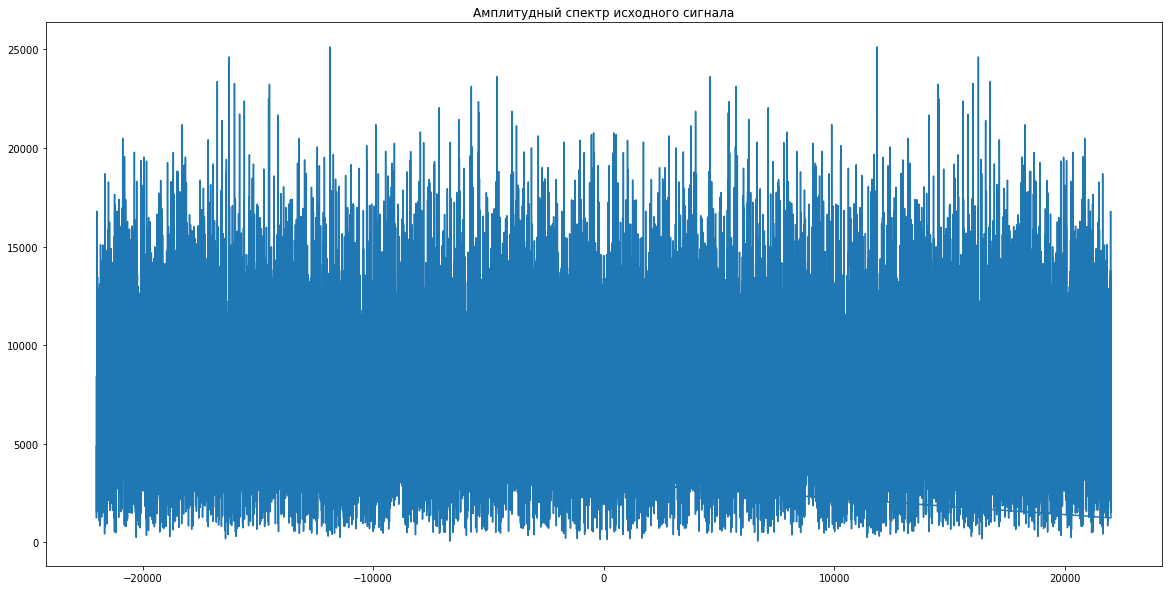

In [5]:
plt.figure(figsize=(20, 10))
plt.title("Амплитудный спектр исходного сигнала")
plt.plot(fk, abs(dfp))

In [6]:
Ha = [1 - (abs(fk[i]) / Fc) if abs(fk[i]) < Fc and abs(fk[i]) < F/2 else 0.01 for i in range(len(fk))]

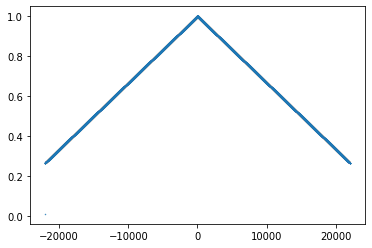

In [7]:
plt.scatter(fk, Ha, s=0.2)

In [8]:
dfp_noise = np.array([dfp[i] * Ha[i] for i in range(len(fk))])

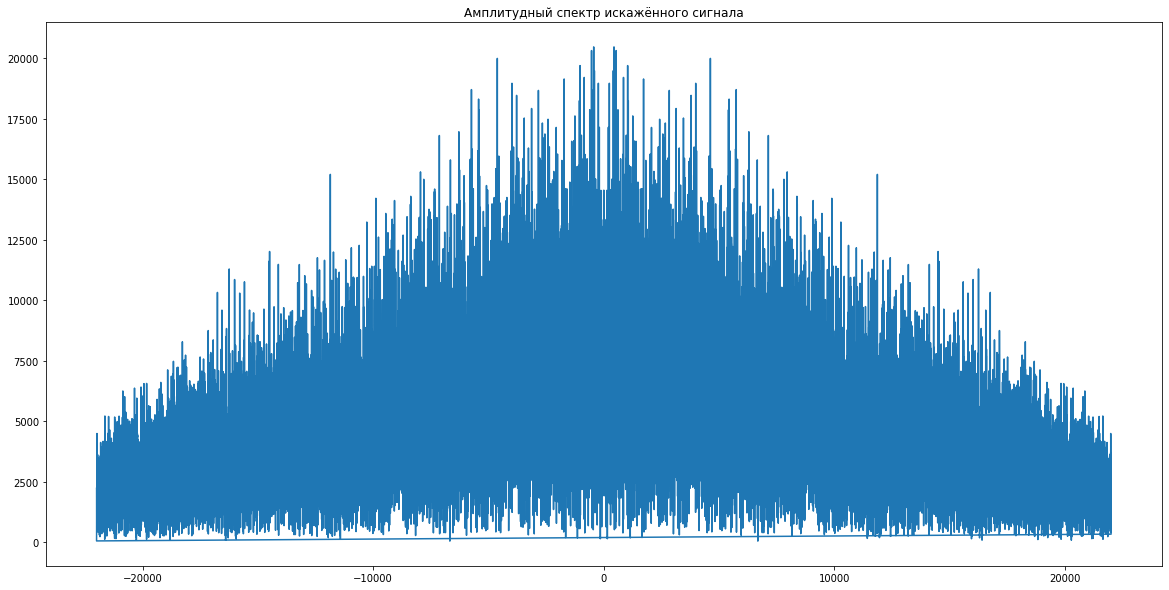

In [9]:
plt.figure(figsize=(20, 10))
plt.title("Амплитудный спектр искажённого сигнала")
plt.plot(fk, abs(dfp_noise))

/home/qwe/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


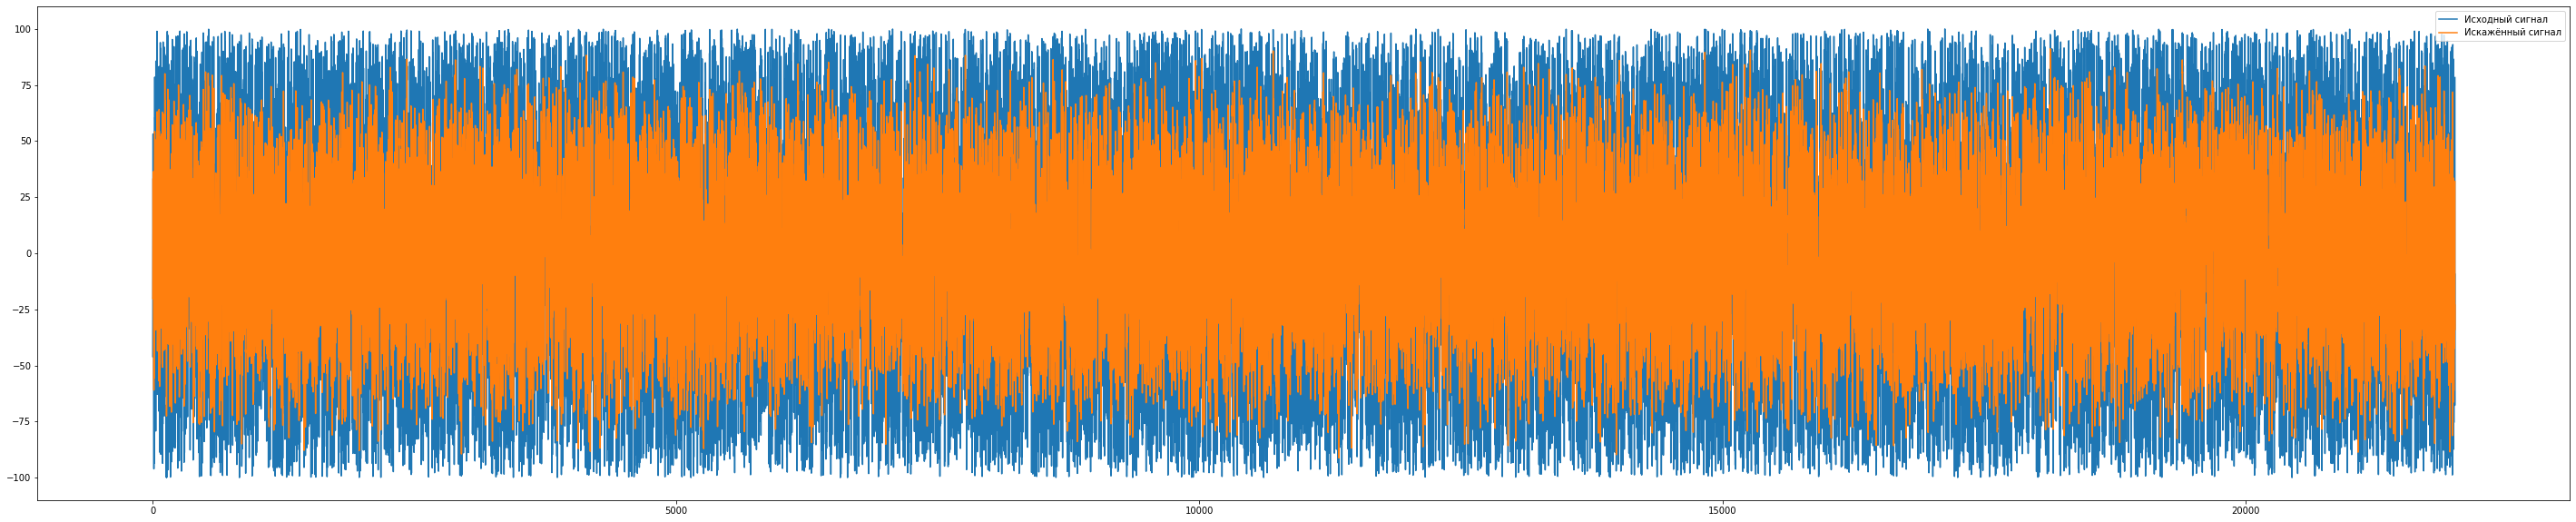

In [10]:
noised_signal = np.fft.ifft(dfp_noise)

plt.figure(figsize=(50, 10))
plt.plot(range(N), source_signal)
plt.plot(range(N), noised_signal)
plt.legend(["Исходный сигнал", "Искажённый сигнал"])

In [11]:
Hf = [1 / H for H in Ha]

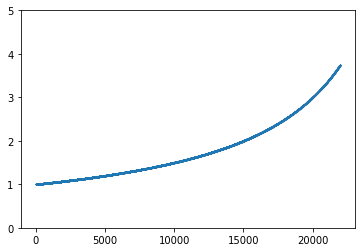

In [12]:
plt.ylim(0,5)
plt.scatter(fk[:int(len(fk)/ 2)], Hf[:int(len(fk)/ 2)], s=0.2)

In [13]:
# очистка сигнала через ДПФ
# dfp_clear = np.array([dfp_noise[i] * Hf[i] for i in range(len(fk))])

In [14]:
'''clear_signal = np.fft.ifft(dfp_clear)

plt.figure(figsize=(50, 10))
plt.plot(range(N), source_signal)
plt.figure(figsize=(50, 10))
plt.plot(range(N), clear_signal)
# plt.legend(["Исходный сигнал", "Очищенный сигнал"])'''

'clear_signal = np.fft.ifft(dfp_clear)\n\nplt.figure(figsize=(50, 10))\nplt.plot(range(N), source_signal)\nplt.figure(figsize=(50, 10))\nplt.plot(range(N), clear_signal)\n# plt.legend(["Исходный сигнал", "Очищенный сигнал"])'

In [15]:
# очистка сигнала с помощью КИХ-фильтра
h_ = firls(1111, range(0, int(F/2), 2), Hf[:int(len(Hf)/ 2)], fs=F)

In [16]:
fix = np.convolve(noised_signal, h_, mode='same')

/home/qwe/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


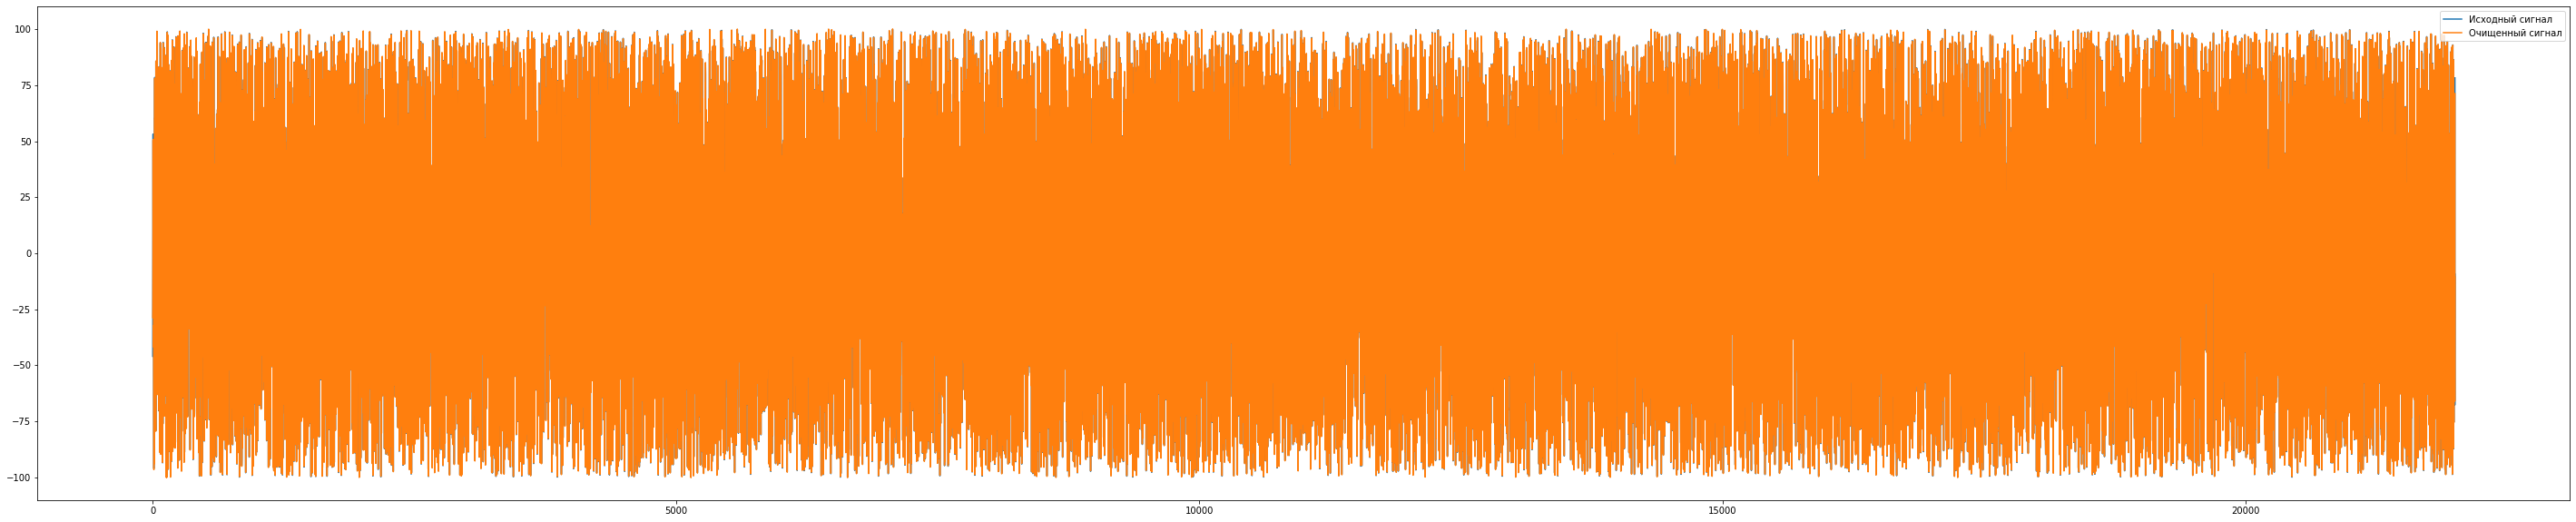

In [17]:
plt.figure(figsize=(50, 10))
plt.plot(range(N), source_signal)
plt.plot(range(N), fix)
plt.legend(["Исходный сигнал", "Очищенный сигнал"])